In [1]:
import pandas as pd
import numpy as np

import random

import operator
import math
import tqdm

from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import string
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import wordnet as wn
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud



import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import cross_val_score

import joblib



In [2]:
from google.colab import files
uploaded = files.upload()

Saving RR_webscraping.xlsx to RR_webscraping.xlsx


# Loading the whole Dataset

In [8]:
import io
df = pd.read_excel(io.BytesIO(uploaded['RR_webscraping.xlsx']))
df

,Review,Rating
0,very important tool thank you flipkart nice pr...,5
1,this product was amazing and quality are amazi...,3
2,The Product is awesome at this very price rang...,4
3,Product is nice but not prefect.....for the pr...,3
4,All type of tools are available with good shap...,4
...,...,...
17322,In my case one dumble is 3 kg and other is 2....,3
17323,Good product,1
17324,It’s fake product,1
17325,"Nice product,",5


# Basic Statistics of Our DataSet

In [9]:
#Basic Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17327 entries, 0 to 17326
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  17325 non-null  object
 1   Rating  17327 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 270.9+ KB


In [10]:
#column names
df.columns

Index(['Review', 'Rating'], dtype='object')

In [11]:
#datatypes of the Attributes
df.dtypes

Review    object
Rating     int64
dtype: object

In [12]:
#No of rows and columns
df.shape

(17327, 2)

# Finding Missing Values

In [13]:
df.isnull().sum()

Review    2
Rating    0
dtype: int64

In [14]:
df.dropna(axis="rows",inplace=True)


In [15]:
df.isnull().sum()


Review    0
Rating    0
dtype: int64

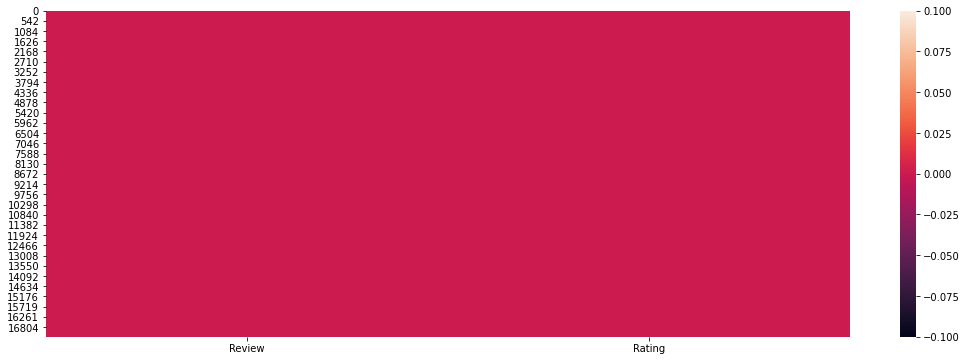

In [16]:
#Graphical Visuvalization of Missing values
plt.figure(figsize=(18,6))
sns.heatmap(df.isnull())

# column Rating statistics

In [17]:
df['Rating'].unique()

array([5, 3, 4, 2, 1])

In [18]:
df["Rating"].value_counts()

5    7486
4    3619
1    2840
3    2250
2    1130
Name: Rating, dtype: int64

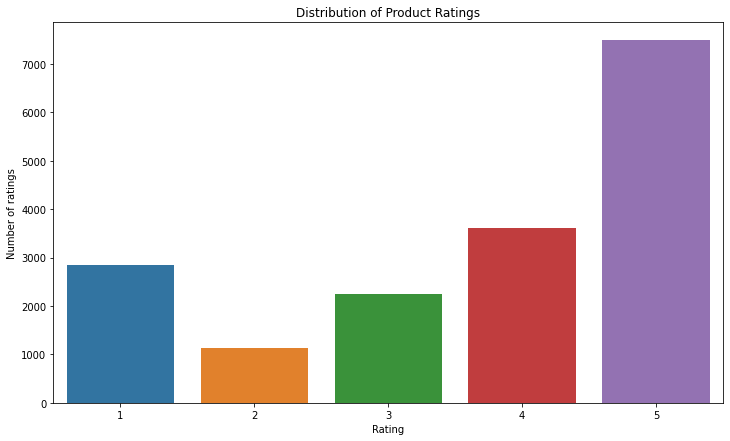

In [19]:
f, axes = plt.subplots(figsize=(12,7))
ax = sns.countplot(x=df['Rating'])
ax.set(title="Distribution of Product Ratings", xlabel="Rating", ylabel="Number of ratings")
plt.show()

# Removing Word Review

In [20]:


df["Review"]=df["Review"].replace(to_replace='READ MORE', value="",regex=True)
df["Review"]


0        very important tool thank you flipkart nice pr...
1        this product was amazing and quality are amazi...
2        The Product is awesome at this very price rang...
3        Product is nice but not prefect.....for the pr...
4        All type of tools are available with good shap...
                               ...                        
17322    In my case  one dumble is 3 kg and other is 2....
17323                                         Good product
17324                                    It’s fake product
17325                                        Nice product,
17326                          Product quality is not well
Name: Review, Length: 17325, dtype: object

# Balancing the Dataset

In [21]:
rating5 = df[df['Rating']==5]
rating4 = df[df['Rating']==4]
rating3 = df[df['Rating']==3]
rating2 = df[df['Rating']==2]
rating1 = df[df['Rating']==1]

In [22]:
rating5.info()
rating4.info()
rating3.info()
rating2.info()
rating1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 17325
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  7486 non-null   object
 1   Rating  7486 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 175.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3619 entries, 2 to 17315
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  3619 non-null   object
 1   Rating  3619 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 84.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2250 entries, 1 to 17322
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  2250 non-null   object
 1   Rating  2250 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 52.7+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1130 entries, 12 to 17317
Data columns (tot

In [23]:
dft=pd.concat([rating1[0:1130], rating2[0:1130], rating3[0:1130], rating4[0:1130], rating5[0:1130]])

dft.shape

(5650, 2)

# Data-Set Pre-Processing

In [24]:
#Getting the length of the 'Reviews'
dft['review_length'] = dft['Review'].str.len()
dft.head()

,Review,Rating,review_length
14,"Products aren't good enough and not reliable, ...",1,163
103,Pathetic. Poor. Not recommended,1,31
105,Guys don't buy this item. The case and hold ar...,1,288
106,"such a bad product, with 2,3 use the tip bent....",1,82
107,It is not jackely productIt is another company...,1,56


In [25]:
#Converting all the characters in the reviews to lowercase
dft['Review'] = dft['Review'].str.lower()
dft

,Review,Rating,review_length
14,"products aren't good enough and not reliable, ...",1,163
103,pathetic. poor. not recommended,1,31
105,guys don't buy this item. the case and hold ar...,1,288
106,"such a bad product, with 2,3 use the tip bent....",1,82
107,it is not jackely productit is another company...,1,56
...,...,...,...
2727,nice 😊👍,5,7
2731,nice,5,4
2732,nice product,5,12
2733,very good products and i am happy.,5,34


In [26]:
#Replace any email addresses as "emailaddress"
dft['Review'] = dft['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')
#Replace any web site addresses as "webaddress"
dft['Review'] = dft['Review'].str.replace(r"^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$",
                                             'webaddress')
#Replace any currencies as 'currencyamount'
dft['Review'] = dft['Review'].str.replace(r'£|\$|₹','currencyamount')
#Replace any phone numbers as "phonenumber"
dft['Review'] = dft['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','phonenumber')
#Replace any numbers as "numbr"
dft['Review'] = dft['Review'].str.replace(r'\d+(\.\d+)?','numbr')
#Replace any non alphabetic characters with a blank space
dft['Review'] = dft['Review'].str.replace(r'[^\w\d\s]',' ')
#Replace any extra statuses with a single blank space
dft['Review'] = dft['Review'].str.replace(r'\s+',' ')

dft

,Review,Rating,review_length
14,products aren t good enough and not reliable t...,1,163
103,pathetic poor not recommended,1,31
105,guys don t buy this item the case and hold are...,1,288
106,such a bad product with numbr numbr use the ti...,1,82
107,it is not jackely productit is another company...,1,56
...,...,...,...
2727,nice,5,7
2731,nice,5,4
2732,nice product,5,12
2733,very good products and i am happy,5,34


In [27]:
#Converting the 'Reviews' column type as 'str'
dft['Review'] = dft['Review'].astype('str')
dft

,Review,Rating,review_length
14,products aren t good enough and not reliable t...,1,163
103,pathetic poor not recommended,1,31
105,guys don t buy this item the case and hold are...,1,288
106,such a bad product with numbr numbr use the ti...,1,82
107,it is not jackely productit is another company...,1,56
...,...,...,...
2727,nice,5,7
2731,nice,5,4
2732,nice product,5,12
2733,very good products and i am happy,5,34


In [33]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [30]:
#Remove all the stopwords
stop_words = set(stopwords.words('english') + ['u','ur','im','doin','ure','i','so'])

dft['Review'] = dft['Review'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))
dft

,Review,Rating,review_length
14,products good enough reliable screws wears eve...,1,163
103,pathetic poor recommended,1,31
105,guys buy item case hold good quality attachmen...,1,288
106,bad product numbr numbr use tip bent totally u...,1,82
107,jackely productit another company product,1,56
...,...,...,...
2727,nice,5,7
2731,nice,5,4
2732,nice product,5,12
2733,good products happy,5,34


In [31]:
 #Get the length of cleaned Review texts
dft['clean_length'] = dft['Review'].str.len()


print('Original Length', dft.review_length.sum())
print('Clean Length', dft.clean_length.sum())

Original Length 229845
Clean Length 157400


In [34]:
#Lemmetizing
WL = WordNetLemmatizer()
dft['Review'] = dft['Review'].apply(lambda x: ' '.join(WL.lemmatize(i) for i in x.split()))
dft.head(10)

,Review,Rating,review_length,clean_length
14,product good enough reliable screw wear even m...,1,163,120
103,pathetic poor recommended,1,31,25
105,guy buy item case hold good quality attachment...,1,288,201
106,bad product numbr numbr use tip bent totally u...,1,82,64
107,jackely productit another company product,1,56,41
108,good quality itemwaste,1,33,22
111,good product small paich,1,37,24
114,good bad,1,16,8
115,bad product tool metal good,1,42,28
121,good used,1,40,9


# Word Clouds

## Word cloud for Rating 1

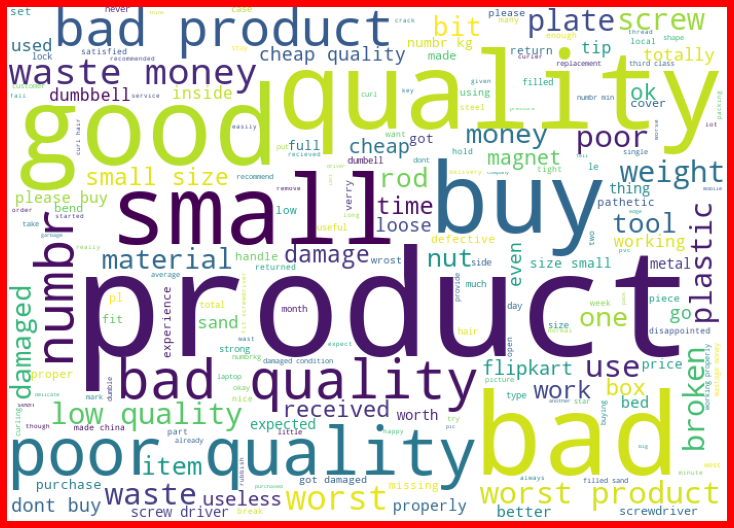

In [35]:
#Getting sense of words in Rating 1
plot = dft['Review'][dft['Rating']==1.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Word cloud for Rating 2

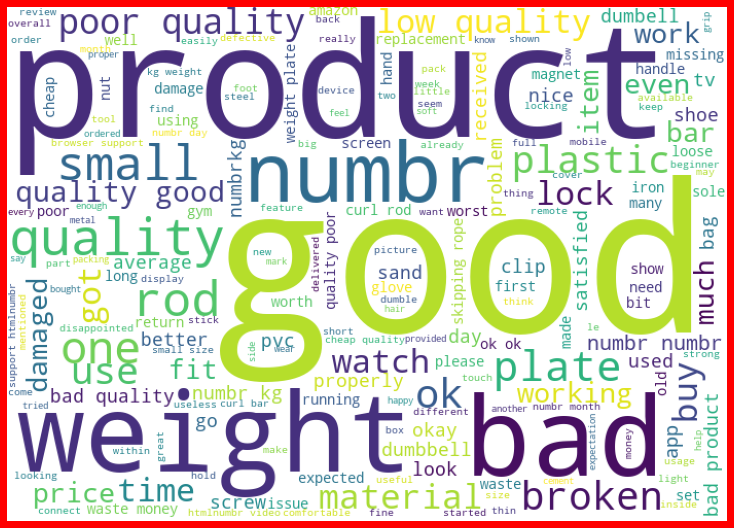

In [36]:
plot = dft['Review'][dft['Rating']==2.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Word cloud for Rating 3

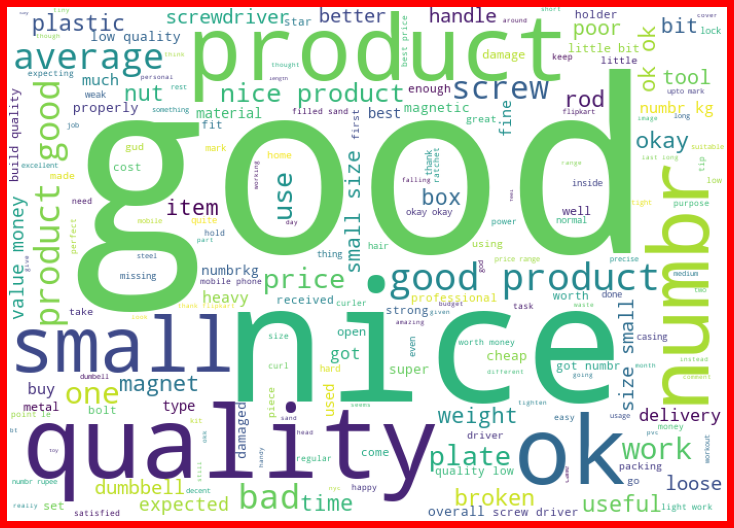

In [37]:
plot = dft['Review'][dft['Rating']==3.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Word cloud for Rating 4

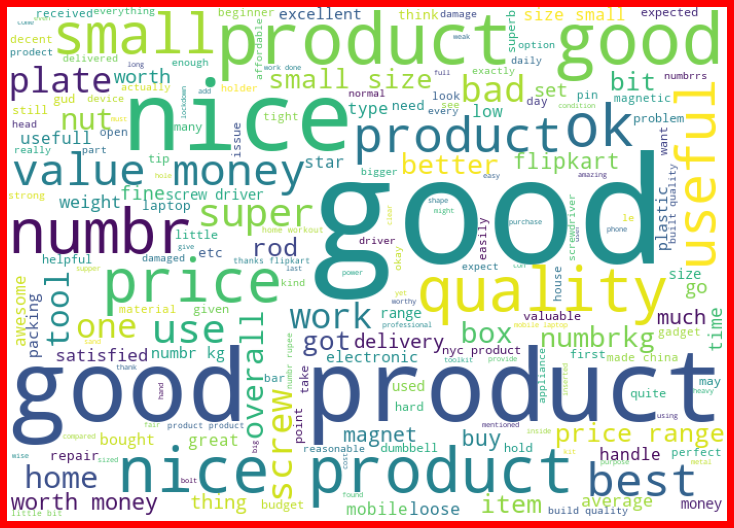

In [38]:
plot = dft['Review'][dft['Rating']==4.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Word cloud for Rating 5

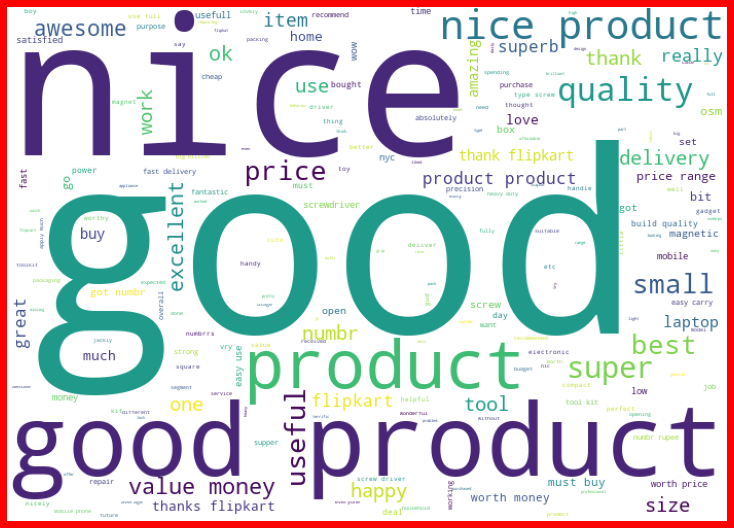

In [39]:
plot = dft['Review'][dft['Rating']==5.0]
plot_cloud = WordCloud(width=700,height=500,background_color='white',max_words=200).generate(' '.join(plot))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(plot_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

Observations:

1. We can see that there is a clear distinction between the words used in the reviews of Rating 1 and Rating 5.
2. The Rating 1 reviews have many negative words for eg: 'Stopped working', 'waste money', 'bad product', etc,.
3. The Rating 5 reviews have many positive words for eg: 'value money', 'nice product', 'better', 'good quality'.
4. Some of these positive words in Rating 5 reviews are also available in Ratings 3 and 4.
5.There are some other words in the word cloud that are unique to Ratings 3, 4 and 5 respectively.
 Hence, it would make sense to use monogram, bigram and trigram while using TFIDF.

# Feature selection

###### Creating TFIDF features of monogram, bigram and trigram with max features upto 10,000

In [43]:
tf_vec = TfidfVectorizer(ngram_range=(1,3),max_features=10000)

features = tf_vec.fit_transform(dft['Review'])

x = features
y = dft['Rating']

In [44]:
#Creating train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=.20)

# Model Selection

In [45]:
#Importing all the model library

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

#Importing Boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV,cross_val_score

In [46]:
KNN=KNeighborsClassifier(n_neighbors=6)
DT=DecisionTreeClassifier(random_state=6)
RF=RandomForestClassifier()
ADA=AdaBoostClassifier()
MNB=MultinomialNB()
GBC=GradientBoostingClassifier()
BC=BaggingClassifier()
ETC=ExtraTreesClassifier()

In [47]:
models= []
models.append(('KNeighborsClassifier', KNN))
models.append(('DecisionTreeClassifier', DT))
models.append(('RandomForestClassifier', RF))
models.append(('AdaBoostClassifier', ADA))
models.append(('MultinomialNB', MNB))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))
models.append(('ExtraTreesClassifier', ETC))

In [48]:
Model= []
score= []
cvs=[]
for name,model in models:

    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    AS=accuracy_score(y_test,pre)
    score.append(AS*100)
    sc= cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    cvs.append(sc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


classification_report
               precision    recall  f1-score   support

           1       0.52      0.38      0.44       226
           2       0.29      0.40      0.34       224
           3       0.27      0.35      0.30       234
           4       0.35      0.08      0.14       226
           5       0.35      0.47      0.40       220

    accuracy                           0.34      1130
   macro avg       0.36      0.34      0.32      1130
weighted avg       0.36      0.34      0.32      1130



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
    

In [49]:
result = pd.DataFrame({'Model': Model, 'Accuracy_score': score,'Cross_val_score': cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,33.628319,31.929204
1,DecisionTreeClassifier,48.584071,38.584071
2,RandomForestClassifier,53.274336,41.646018
3,AdaBoostClassifier,42.477876,39.398230
4,MultinomialNB,51.946903,44.725664
5,GradientBoostingClassifier,47.345133,40.938053
6,BaggingClassifier,47.699115,40.247788
7,ExtraTreesClassifier,51.946903,41.858407


# HYPERPARAMETER TUNING

In [50]:
#RandomForestClassifier
parameters={'n_estimators':[1,10,100]}
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(random_state=96)   
rfc=GridSearchCV(rfc,parameters,cv=3,scoring='accuracy')
rfc.fit(x_train,y_train)
print(rfc.best_params_)     
print(rfc.best_score_)

{'n_estimators': 100}
0.4840712355180032


In [51]:
#Using the best parameters obtained
gbc=GradientBoostingClassifier(random_state=96,n_estimators=100)
gbc.fit(x_train,y_train)
pred=gbc.predict(x_test)
print("Accuracy score: ",accuracy_score(y_test,pred)*100)
print('Cross validation score: ',cross_val_score(gbc,x,y,cv=3,scoring='accuracy').mean()*100)
print('Classification report: \n')
print(classification_report(y_test,pred))
print('Confusion matrix: \n')
print(confusion_matrix(y_test,pred))

Accuracy score:  47.34513274336283
Cross validation score:  39.59330494208433
Classification report: 

              precision    recall  f1-score   support

           1       0.61      0.69      0.65       226
           2       0.45      0.46      0.45       224
           3       0.45      0.25      0.32       234
           4       0.41      0.30      0.34       226
           5       0.43      0.69      0.53       220

    accuracy                           0.47      1130
   macro avg       0.47      0.48      0.46      1130
weighted avg       0.47      0.47      0.46      1130

Confusion matrix: 

[[157  46   8   7   8]
 [ 67 102  24  19  12]
 [ 21  37  58  43  75]
 [  6  19  32  67 102]
 [  7  25   8  29 151]]


In [53]:
rating_predictor_final_model = GradientBoostingClassifier(n_estimators = 233, 
                                          min_samples_split = 2, 
                                          min_samples_leaf = 1, 
                                          max_features = 'auto', 
                                          max_depth = 100)

In [54]:
rating_predictor_final_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=100,
                           max_features='auto', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=233,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

# Final model

In [52]:
rating_prediciton=rfc.predict(x)
Ratings_Prediction = pd.DataFrame({'Prediciton' : rating_prediciton})
Ratings_Prediction.head(5)

,Prediciton
0,1
1,1
2,1
3,1
4,2


# CONCLUSION

1. The more the data the better the model performs.
2. Accuracy is a good metric since the data is perfectly balanced.
3. The GradientBoostingClassifier gives a good result after hyperparameter tuning. 
4. Adding more sample data to the training can improve the performance.
5. Using Word Embedding techniques like Word2Vec with better computation power can give better performance


